# Tabulated Integrand

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

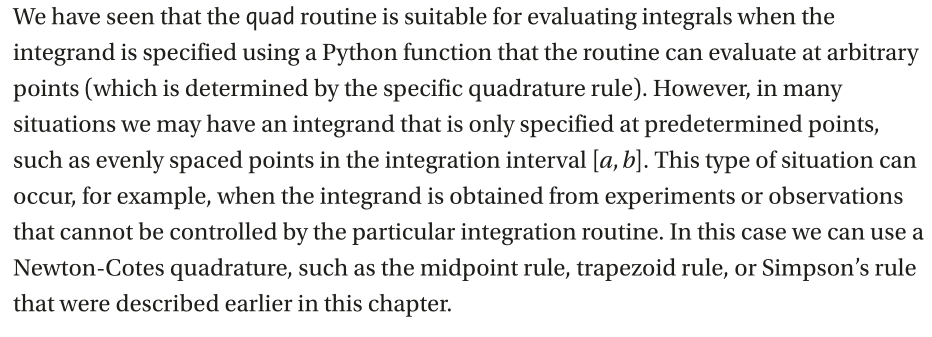
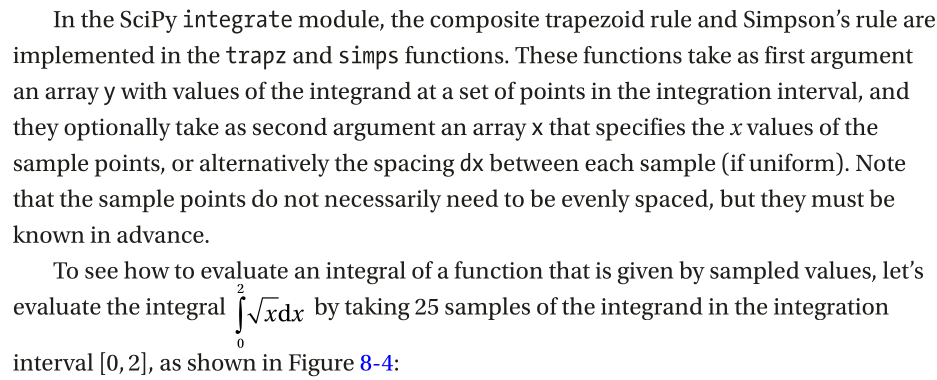

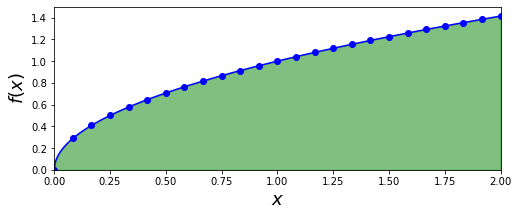

In [11]:
f = lambda x: np.sqrt(x)
a, b = 0, 2
x = np.linspace(a, b, 25)

y = f(x)

fig, ax = plt.subplots(figsize=(8, 3))

# Blue dots to mark the values
ax.plot(x, y, 'bo')

# Make the line between the dots
xx = np.linspace(a, b, 500)
ax.plot(xx, f(xx), 'b-')

ax.fill_between(xx, f(xx), color='green', alpha=0.5)

ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x)$", fontsize=18)

# Setup the limits
ax.set_ylim(0, 1.5)
ax.set_xlim(0, 2)

> Integrand given as tabulated values marked with dots. The integral
corresponds to the shaded area

To evaluate the integral, we can pass the `x` and `y` arrays to the `trapz` or `simps`
methods. Note that the y array must be passed as the first argument

In [14]:
val_trapz = integrate.trapz(y, x)
val_trapz

In [15]:
val_simps = integrate.simps(y, x)
val_simps

The `trapz` and `simps` functions do not provide any error estimates, but for this
particular example, we can compute the integral analytically and compare to the
numerical values computed with the two methods

$$\int {\sqrt(x)} dx = \frac{2}{3} x^{\frac{3}{2}} + C$$

In [17]:
# The exact function value
val_exact = 2.0/3.0 * (b-a)**(3.0/2.0)
val_exact

In [18]:
val_exact - val_trapz

In [21]:
# Sympsone rule is much better!
val_exact - val_simps

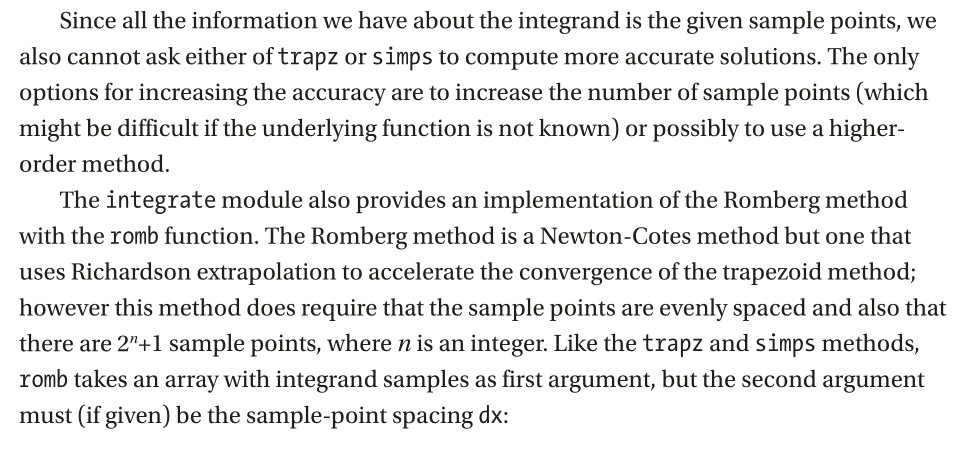

In [39]:
s = 1 + 2**7

x = np.linspace(a, b, s)

# Number of meshpoints
len(x)

In [41]:
# Define y axis data points
y = f(x)

# Linspase give the equal intevals between points, so it's enough to compute diff between first two points
dx = x[1] - x[0]
dx

In [42]:
val_exact - integrate.romb(y, dx=dx)

> Among the SciPy integration functions that we have discussed here, `simps` is perhaps
the most useful one overall, since it provides a good balance between ease of use (no
constraints on the sample points) and relatively good accuracy